In [ ]:
#----------------------------------------------ASSIGNMENT-15------------------------------!

In [ ]:
#---------------------------------------------LGBM AND XGBM--------------------------------

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb

In [3]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 777.7 kB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.4 MB 3.1 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.4 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.6 MB/s eta 0:00:00


In [5]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 409.6 kB/s eta 0:05:05
   ---------------------------------------- 0.2/124.9 MB 706.2 kB/s eta 0:02:57
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:53
   ---------------------------------------- 0.3/124.9 MB 1.2 MB/s eta 0:01:41
   ---------------------------------------- 0.7/124.9 MB 2.2 MB/s eta 0:00:58
   ---------------------------------------- 0.9/124.9 MB 2.2 MB/s eta 0:00:57
   ---------------------------------------- 1.3/124.9 MB 3.2 MB/s eta 0:00:40
   ---------------------------------------- 1.5/124.9 MB 3.2 MB/s eta 0:00:40
    --------------------------------------- 2.1/124.9 MB 4.1 MB/s eta 0:00:31
    ------

In [9]:
#Loading the dataset
train_data = pd.read_csv("C:\\Users\\Ashish\\Downloads\\Data Science Assignments\\XGBM & LGBM\\Titanic_train.csv")
test_data =  pd.read_csv("C:\\Users\\Ashish\\Downloads\\Data Science Assignments\\XGBM & LGBM\\Titanic_test.csv")

In [11]:
#Printing first few rows of data
print("Training Data Loaded Successfully")
print("\nTraining Dataset Overview:")
print(train_data.head())

Training Data Loaded Successfully

Training Dataset Overview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123     

In [13]:
print("\nTesting Data Loaded Successfully")
print("\nTesting Dataset Overview:")
print(test_data.head())


Testing Data Loaded Successfully

Testing Dataset Overview:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [15]:
#Checking for missing values
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Testing Data:")
print(test_data.isnull().sum())


Missing Values in Training Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values in Testing Data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


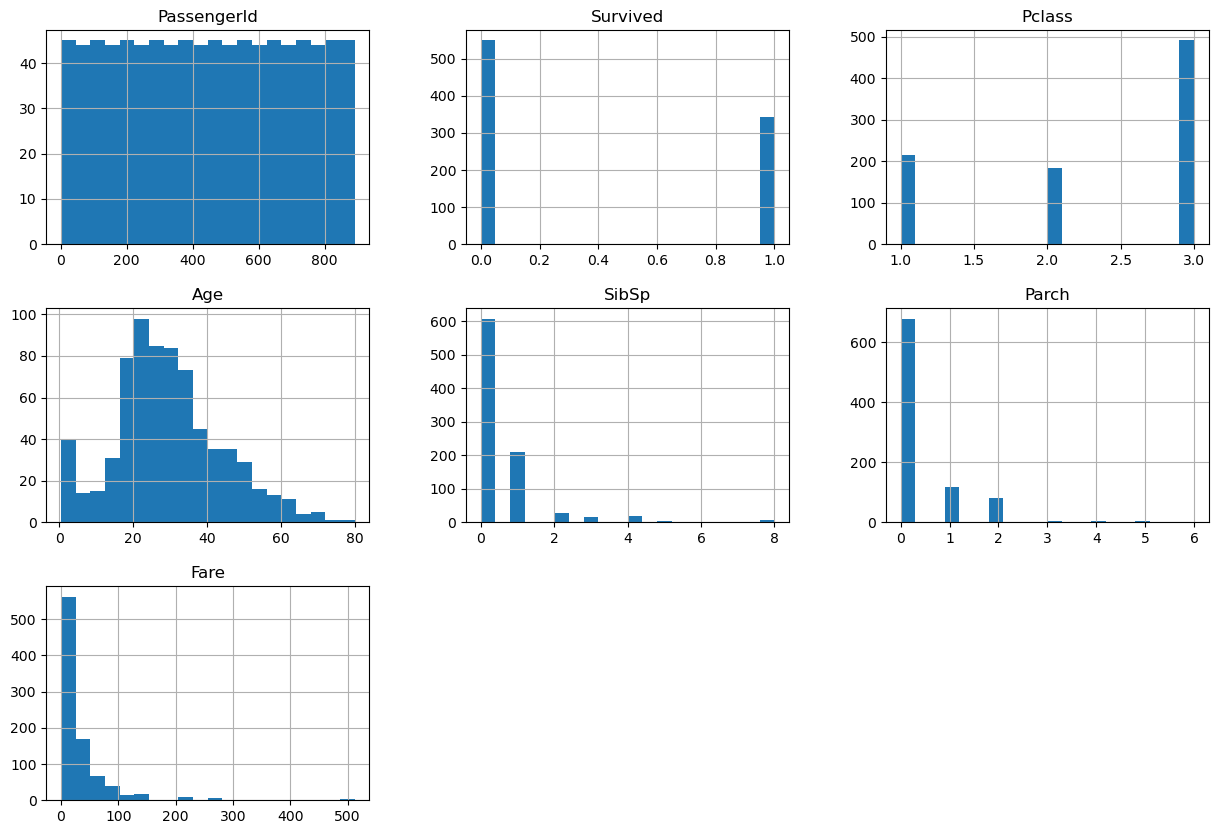

In [17]:
#Histograms
train_data.hist(bins=20, figsize=(15, 10))
plt.show()


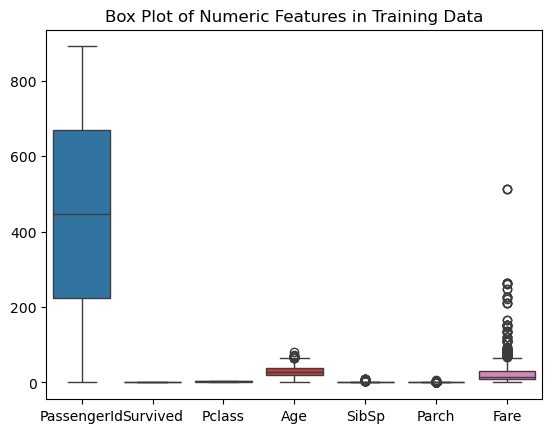

In [19]:
#Boxplots
sns.boxplot(data=train_data.select_dtypes(include=np.number))
plt.title("Box Plot of Numeric Features in Training Data")
plt.show()


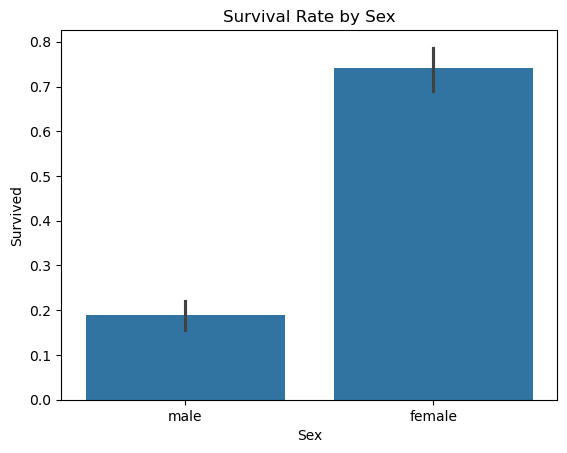

In [21]:
#Barplot
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title("Survival Rate by Sex")
plt.show()

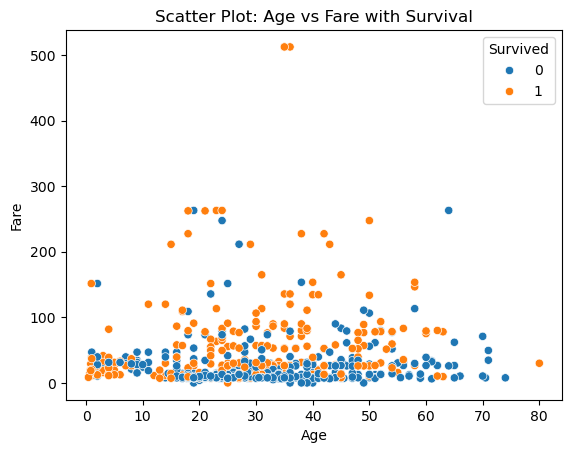

In [23]:
#Scatterplot
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title("Scatter Plot: Age vs Fare with Survival")
plt.show()

In [15]:
#Data Preprocessing
def preprocess_data(data, is_train=True):
    data = data.copy()
    
    if 'Age' in data.columns:
        data['Age'].fillna(data['Age'].median(), inplace=True)
    if 'Embarked' in data.columns:
        data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    if 'Fare' in data.columns:
        data['Fare'].fillna(data['Fare'].median(), inplace=True)

    if 'Sex' in data.columns:
        data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

    drop_cols = ['Name', 'Ticket', 'Cabin']
    if not is_train:
        drop_cols.append('PassengerId')
    data.drop(columns=[col for col in drop_cols if col in data.columns], inplace=True)

    return data

In [75]:
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data, is_train=False)

C:\Users\Ashish\AppData\Local\Temp\ipykernel_9744\535172327.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Ashish\AppData\Local\Temp\ipykernel_9744\535172327.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [19]:
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']

In [21]:
X_test = test_data

In [23]:
lgbm_model = lgb.LGBMClassifier()
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

In [79]:
#Model Fitting
lgbm_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 477
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


LGBMClassifier()

In [81]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [55]:
#Light GBM Model Evaluation
lgbm_predictions = lgbm_model.predict(X_train)
print(f"\n LGB Model Training Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_train, lgbm_predictions):.4f}")
print(f"Precision: {precision_score(y_train, lgbm_predictions):.4f}")
print(f"Recall: {recall_score(y_train, lgbm_predictions):.4f}")
print(f"F1-Score: {f1_score(y_train, lgbm_predictions):.4f}")
print("\n")
print(classification_report(y_train, lgbm_predictions))


 LGB Model Training Performance Metrics:
Accuracy: 0.9966
Precision: 1.0000
Recall: 0.9912
F1-Score: 0.9956


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       549
           1       1.00      0.99      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



In [59]:
#XGB Model Evaluation
xgb_predictions = xgb_model.predict(X_train)
print(f"\n XGB Model Training Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_train, xgb_predictions):.4f}")
print(f"Precision: {precision_score(y_train, xgb_predictions):.4f}")
print(f"Recall: {recall_score(y_train, xgb_predictions):.4f}")
print(f"F1-Score: {f1_score(y_train, xgb_predictions):.4f}")
print("\n")
print(classification_report(y_train, xgb_predictions))


 XGB Model Training Performance Metrics:
Accuracy: 0.9978
Precision: 1.0000
Recall: 0.9942
F1-Score: 0.9971


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      0.99      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



In [71]:
# Hyperparameter Tuning 
lgbm_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}
lgbm_grid = GridSearchCV(lgb.LGBMClassifier(random_state=42), param_grid=lgb_param_grid, cv=5, scoring='accuracy')
lgbm_grid.fit(X_train, y_train)

xgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200]
}
xgb_grid = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), 
                         param_grid=xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

print("\nBest LightGBM Parameters:", lgbm_grid.best_params_)
print("\nBest XGBoost Parameters:", xgb_grid.best_params_)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 441
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\Ashish\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:12:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Ashish\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:12:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Ashish\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:12:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Ashish\anaconda3\Lib\site-packa


Best LightGBM Parameters: {'learning_rate': 0.01, 'n_estimators': 200, 'num_leaves': 31}

Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}


C:\Users\Ashish\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:12:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Ashish\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:12:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [65]:
# Comparative Analysis
metrics = {
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_score(y_train, lgbm_predictions), accuracy_score(y_train, xgb_predictions)],
    'Precision': [precision_score(y_train, lgbm_predictions), precision_score(y_train, xgb_predictions)],
    'Recall': [recall_score(y_train, lgbm_predictions), recall_score(y_train, xgb_predictions)],
    'F1 Score': [f1_score(y_train, lgbm_predictions), f1_score(y_train, xgb_predictions)]
}

In [67]:
metrics_df = pd.DataFrame(metrics)
print("\nComparative Analysis:")
print(metrics_df)


Comparative Analysis:
      Model  Accuracy  Precision    Recall  F1 Score
0  LightGBM  0.996633        1.0  0.991228  0.995595
1   XGBoost  0.997755        1.0  0.994152  0.997067


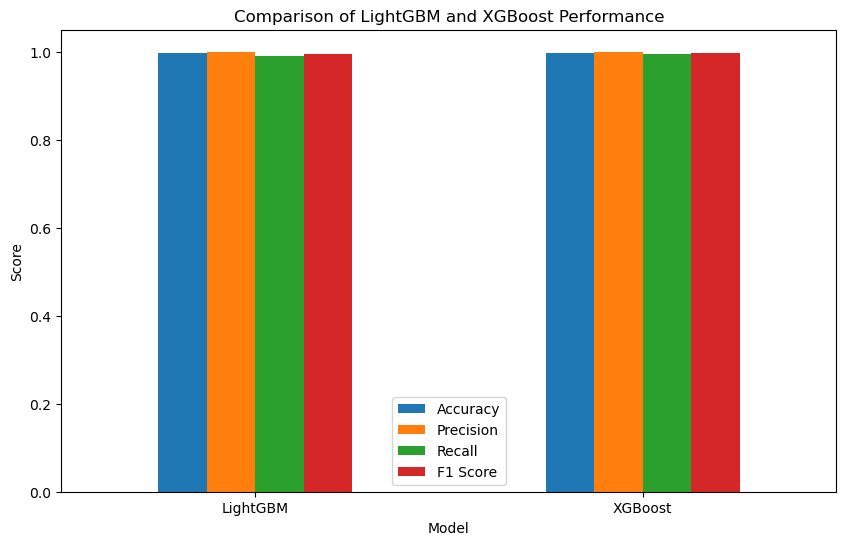

In [69]:
# Visualize the results
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of LightGBM and XGBoost Performance')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

In [ ]:
#-------------------------Finish--------------------------!